In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# On fixe la graine
random.seed(42)

In [3]:
data=pd.read_csv("data_seed2.txt", sep="\t", decimal=",", dtype="object")
data.columns = data.columns.str.lower()
data.head()

datdelhis_mm0      numtecprs sldcrdmms_sum_mm1 engagement_sum_mm1  \
0       202 410  9 201 003 869              0,00             800,00   
1       202 410  9 599 624 616          1 152,00             200,00   
2       202 412  1 413 515 491         87 805,00           6 680,61   
3       202 404  1 600 773 833          2 468,00             200,00   
4       202 409  2 661 466 041        513 708,00           1 000,00   

  top_pret_conso_mm1 nbr_pret_conso_mm1 sldcrdmms_sum_mm2 engagement_sum_mm2  \
0               0,00               0,00              0,00             800,00   
1               0,00               0,00          1 755,00             200,00   
2               1,00               1,00         76 354,00           6 738,46   
3               0,00               0,00          2 534,00             200,00   
4               0,00               0,00        257 317,00           1 000,00   

  top_pret_conso_mm2 nbr_pret_conso_mm2  ... crtad_ag_solde_t1  \
0               0,00               0,00  ...        -47 333,00   
1               0,00               0,00  ...         -3 333,00   
2               1,00               1,00  ...        220 333,00   
3               0,00               0,00  ...          3 666,00   
4               0,00               0,00  ...        370 333,00   

  crtad_ag_solde_t2 encours_par crtad_ag_nbjde_bb crtad_ag_nbjde_ba  \
0        -13 333,00        0,00             92,00            262,00   
1         -3 000,00    1 000,00             71,00            321,00   
2        146 666,00  157 084,00              0,00             13,00   
3          8 333,00   57 333,00             12,00             17,00   
4        210 666,00        0,00              9,00            247,00   

  crtad_ag_nbjde_bc topcptlitig somme_encours cible rnd_1_20  
0              5,00           0          0,00     0        2  
1             54,00           0      1 000,00     0        2  
2              0,00           0    157 084,00     0        2  
3              0,00           0     57 333,00     0        2  
4             60,00           0          0,00     0        2  

[5 rows x 130 columns]

In [4]:
data_kaggle=pd.read_excel("data kaggle.xlsx")
data_kaggle.columns = data_kaggle.columns.str.lower()
data_kaggle.head()

datdelhis_mm0   numtecprs                 id sldcrdmms_sum_mm1  \
0         202409  6099659558  202409@6099659558             63534   
1         202405   599766044   202405@599766044            168649   
2         202412  5125674890  202412@5125674890              9494   
3         202401  2453995549  202401@2453995549            127272   
4         202401  1166976276  202401@1166976276             38552   

  engagement_sum_mm1 top_pret_conso_mm1 nbr_pret_conso_mm1 sldcrdmms_sum_mm2  \
0             709.62                  0                  0             45557   
1                800                  0                  0            187860   
2                200                  0                  0              5852   
3           18705.91                  1                  1            178180   
4            26454.7                  1                  1             27453   

  engagement_sum_mm2 top_pret_conso_mm2  ... crtad_ag_solde_t  \
0                500                  0  ...            88500   
1                800                  0  ...           288500   
2                200                  0  ...            14000   
3            18953.3                  1  ...           555333   
4           26774.11                  1  ...           109666   

  crtad_ag_solde_t1 crtad_ag_solde_t2 encours_par crtad_ag_nbjde_bb  \
0             81166             83500     3257587                 3   
1            234500            226000       37333                 0   
2             38666             29333     1428666                31   
3           1040666           1419333       44963                 0   
4             51666             13000      773332                 0   

  crtad_ag_nbjde_ba crtad_ag_nbjde_bc topcptlitig somme_encours rnd_1_20  
0                 6                 0           0       3257587       20  
1                 0                 0           0         37333       20  
2                89                25           0       1428666       20  
3                16                 0           0         44963       20  
4                26                16           0        773332       20  

[5 rows x 130 columns]

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
def ajouter_mois_depuis_colonne(df, colonne):
    # Dictionnaire de correspondance chiffre → mois
    mois_map = {
        '01': 'Jan', '02': 'Fev', '03': 'Mars', '04': 'Avril',
        '05': 'Mai', '06': 'Juin', '07': 'Juil', '08': 'Août',
        '09': 'Sept', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }

    def extraire_mois(val):
        # Convertir en string et extraire les deux derniers chiffres
        deux_derniers = str(val)[-2:]
        # Retourner le mois si possible
        return mois_map.get(deux_derniers, None)
    months= df[colonne].apply(extraire_mois)
    return months

In [7]:
data["month"]=ajouter_mois_depuis_colonne(data, "datdelhis_mm0")
data.head()

datdelhis_mm0      numtecprs sldcrdmms_sum_mm1 engagement_sum_mm1  \
0       202 410  9 201 003 869              0,00             800,00   
1       202 410  9 599 624 616          1 152,00             200,00   
2       202 412  1 413 515 491         87 805,00           6 680,61   
3       202 404  1 600 773 833          2 468,00             200,00   
4       202 409  2 661 466 041        513 708,00           1 000,00   

  top_pret_conso_mm1 nbr_pret_conso_mm1 sldcrdmms_sum_mm2 engagement_sum_mm2  \
0               0,00               0,00              0,00             800,00   
1               0,00               0,00          1 755,00             200,00   
2               1,00               1,00         76 354,00           6 738,46   
3               0,00               0,00          2 534,00             200,00   
4               0,00               0,00        257 317,00           1 000,00   

  top_pret_conso_mm2 nbr_pret_conso_mm2  ... crtad_ag_solde_t2 encours_par  \
0               0,00               0,00  ...        -13 333,00        0,00   
1               0,00               0,00  ...         -3 000,00    1 000,00   
2               1,00               1,00  ...        146 666,00  157 084,00   
3               0,00               0,00  ...          8 333,00   57 333,00   
4               0,00               0,00  ...        210 666,00        0,00   

  crtad_ag_nbjde_bb crtad_ag_nbjde_ba crtad_ag_nbjde_bc topcptlitig  \
0             92,00            262,00              5,00           0   
1             71,00            321,00             54,00           0   
2              0,00             13,00              0,00           0   
3             12,00             17,00              0,00           0   
4              9,00            247,00             60,00           0   

  somme_encours cible rnd_1_20  month  
0          0,00     0        2    Oct  
1      1 000,00     0        2    Oct  
2    157 084,00     0        2    Dec  
3     57 333,00     0        2  Avril  
4          0,00     0        2   Sept  

[5 rows x 131 columns]

In [8]:
##présence de données manquantes
data.loc[[345,]]

datdelhis_mm0      numtecprs sldcrdmms_sum_mm1 engagement_sum_mm1  \
345       202 410  5 510 074 447         14 473,00         117 279,66   

    top_pret_conso_mm1 nbr_pret_conso_mm1 sldcrdmms_sum_mm2  \
345               0,00               0,00         19 523,00   

    engagement_sum_mm2 top_pret_conso_mm2 nbr_pret_conso_mm2  ...  \
345         117 912,64               0,00               0,00  ...   

    crtad_ag_solde_t2 encours_par crtad_ag_nbjde_bb crtad_ag_nbjde_ba  \
345                 ?           ?                 ?                 ?   

    crtad_ag_nbjde_bc topcptlitig somme_encours cible rnd_1_20 month  
345                 ?           ?             ?     0        2   Oct  

[1 rows x 131 columns]

In [9]:
any(data.isna().sum())

False

In [10]:
data.dtypes

datdelhis_mm0         object
numtecprs             object
sldcrdmms_sum_mm1     object
engagement_sum_mm1    object
top_pret_conso_mm1    object
                       ...  
topcptlitig           object
somme_encours         object
cible                 object
rnd_1_20              object
month                 object
Length: 131, dtype: object

In [11]:
data_kaggle['nbr_pret_conso_mm1']

0        0
1        0
2        0
3        1
4        1
        ..
54661    0
54662    0
54663    0
54664    0
54665    0
Name: nbr_pret_conso_mm1, Length: 54666, dtype: object

In [12]:
data_kaggle.dtypes.value_counts()

object     94
int64      20
float64    16
Name: count, dtype: int64

In [13]:
def convert_if_numeric(col):
    if col.dtype == "object":
        # nettoyage
        cleaned = col.str.replace("\u202f", "")
        cleaned = cleaned.str.replace(",", ".")
    else:
        cleaned=col
    numeric_col = pd.to_numeric(cleaned, errors="coerce")
    if numeric_col.notna().any():
        return numeric_col
    return col

def convert_if_numeric2(col):
    numeric_col = pd.to_numeric(col, errors="coerce")
    if numeric_col.notna().any():
        return numeric_col
    return col
# Appliquer la fonction à toutes les colonnes
data = data.apply(convert_if_numeric)
data.head()

datdelhis_mm0   numtecprs  sldcrdmms_sum_mm1  engagement_sum_mm1  \
0         202410  9201003869                0.0              800.00   
1         202410  9599624616             1152.0              200.00   
2         202412  1413515491            87805.0             6680.61   
3         202404  1600773833             2468.0              200.00   
4         202409  2661466041           513708.0             1000.00   

   top_pret_conso_mm1  nbr_pret_conso_mm1  sldcrdmms_sum_mm2  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0             1755.0   
2                 1.0                 1.0            76354.0   
3                 0.0                 0.0             2534.0   
4                 0.0                 0.0           257317.0   

   engagement_sum_mm2  top_pret_conso_mm2  nbr_pret_conso_mm2  ...  \
0              800.00                 0.0                 0.0  ...   
1              200.00                 0.0                 0.0  ...   
2             6738.46                 1.0                 1.0  ...   
3              200.00                 0.0                 0.0  ...   
4             1000.00                 0.0                 0.0  ...   

   crtad_ag_solde_t2  encours_par  crtad_ag_nbjde_bb  crtad_ag_nbjde_ba  \
0           -13333.0          0.0               92.0              262.0   
1            -3000.0       1000.0               71.0              321.0   
2           146666.0     157084.0                0.0               13.0   
3             8333.0      57333.0               12.0               17.0   
4           210666.0          0.0                9.0              247.0   

   crtad_ag_nbjde_bc  topcptlitig  somme_encours  cible  rnd_1_20  month  
0                5.0          0.0            0.0      0         2    Oct  
1               54.0          0.0         1000.0      0         2    Oct  
2                0.0          0.0       157084.0      0         2    Dec  
3                0.0          0.0        57333.0      0         2  Avril  
4               60.0          0.0            0.0      0         2   Sept  

[5 rows x 131 columns]

In [14]:
data_kaggle = data_kaggle.apply(convert_if_numeric2)
data_kaggle.head()

datdelhis_mm0   numtecprs                 id  sldcrdmms_sum_mm1  \
0         202409  6099659558  202409@6099659558            63534.0   
1         202405   599766044   202405@599766044           168649.0   
2         202412  5125674890  202412@5125674890             9494.0   
3         202401  2453995549  202401@2453995549           127272.0   
4         202401  1166976276  202401@1166976276            38552.0   

   engagement_sum_mm1  top_pret_conso_mm1  nbr_pret_conso_mm1  \
0              709.62                 0.0                 0.0   
1              800.00                 0.0                 0.0   
2              200.00                 0.0                 0.0   
3            18705.91                 1.0                 1.0   
4            26454.70                 1.0                 1.0   

   sldcrdmms_sum_mm2  engagement_sum_mm2  top_pret_conso_mm2  ...  \
0            45557.0              500.00                 0.0  ...   
1           187860.0              800.00                 0.0  ...   
2             5852.0              200.00                 0.0  ...   
3           178180.0            18953.30                 1.0  ...   
4            27453.0            26774.11                 1.0  ...   

   crtad_ag_solde_t  crtad_ag_solde_t1  crtad_ag_solde_t2  encours_par  \
0           88500.0            81166.0            83500.0    3257587.0   
1          288500.0           234500.0           226000.0      37333.0   
2           14000.0            38666.0            29333.0    1428666.0   
3          555333.0          1040666.0          1419333.0      44963.0   
4          109666.0            51666.0            13000.0     773332.0   

   crtad_ag_nbjde_bb  crtad_ag_nbjde_ba  crtad_ag_nbjde_bc  topcptlitig  \
0                3.0                6.0                0.0          0.0   
1                0.0                0.0                0.0          0.0   
2               31.0               89.0               25.0          0.0   
3                0.0               16.0                0.0          0.0   
4                0.0               26.0               16.0          0.0   

   somme_encours  rnd_1_20  
0      3257587.0        20  
1        37333.0        20  
2      1428666.0        20  
3        44963.0        20  
4       773332.0        20  

[5 rows x 130 columns]

In [15]:
data_kaggle["sldcrdmms_sum_mm6"].dtypes

dtype('float64')

In [16]:
data_kaggle["sldcrdmms_sum_mm6"].value_counts()

sldcrdmms_sum_mm6
0.0         1950
45.0          10
27.0           9
8.0            8
14.0           7
            ... 
7057.0         1
23555.0        1
76690.0        1
194877.0       1
140152.0       1
Name: count, Length: 44490, dtype: int64

In [17]:
data.loc[[345,]]

datdelhis_mm0   numtecprs  sldcrdmms_sum_mm1  engagement_sum_mm1  \
345         202410  5510074447            14473.0           117279.66   

     top_pret_conso_mm1  nbr_pret_conso_mm1  sldcrdmms_sum_mm2  \
345                 0.0                 0.0            19523.0   

     engagement_sum_mm2  top_pret_conso_mm2  nbr_pret_conso_mm2  ...  \
345           117912.64                 0.0                 0.0  ...   

     crtad_ag_solde_t2  encours_par  crtad_ag_nbjde_bb  crtad_ag_nbjde_ba  \
345                NaN          NaN                NaN                NaN   

     crtad_ag_nbjde_bc  topcptlitig  somme_encours  cible  rnd_1_20  month  
345                NaN          NaN            NaN      0         2    Oct  

[1 rows x 131 columns]

In [18]:
##variables ont des NA
var_with_na=data.isna().sum()
var_with_na[var_with_na>0]

sldcrdmms_sum_mm1     110
engagement_sum_mm1    110
top_pret_conso_mm1    110
nbr_pret_conso_mm1    110
sldcrdmms_sum_mm2     194
                     ... 
crtad_ag_nbjde_bb      40
crtad_ag_nbjde_ba      40
crtad_ag_nbjde_bc      40
topcptlitig            40
somme_encours          40
Length: 92, dtype: int64

In [19]:
print(data.dtypes)
print("\n")
print("Nombre de variables par type\n", data.dtypes.value_counts())

datdelhis_mm0           int64
numtecprs               int64
sldcrdmms_sum_mm1     float64
engagement_sum_mm1    float64
top_pret_conso_mm1    float64
                       ...   
topcptlitig           float64
somme_encours         float64
cible                   int64
rnd_1_20                int64
month                  object
Length: 131, dtype: object


Nombre de variables par type
 float64    118
int64       11
object       2
Name: count, dtype: int64


In [20]:
##reperer les colonnes constantes
def all_constant_columns(df):
    result=[]
    for col in df.columns:
        if df[col].nunique() == 1:
            result.append(col)
    return result
all_constant_columns(data)

['indrskdtx', 'ratio_mensu_imo_solde_dbtsum', 'rnd_1_20']

In [21]:
## Je constate qu'il y a de variables categorielles à valeurs numériques mais prises comme des nombres
# Ici je les repertorie et je les transforme en 'category'
## Sauf les variables: 'sum_nombre_contrat_imo', 'nbr_pret_conso'...le reste des variables int et 0/1 sont catgeorielles

var_binaires = [col for col in data.columns if data[col].dropna().isin([0, 1]).all()]
var_int = list(data.select_dtypes(include='int64').columns)
var_non_concerned=['sum_nombre_contrat_imo', 'nbr_pret_conso', 'cible']

var_finales_concerned = list(set(var_binaires + var_int) - set(var_non_concerned))
for var in var_finales_concerned:
    data[var]=data[var].astype("category")
    if var!="month":
        data_kaggle[var]=data_kaggle[var].astype("category")

In [22]:
print(data.dtypes)
print("\n")
print("Nombre de variables par type\n", data.dtypes.value_counts())

datdelhis_mm0         category
numtecprs             category
sldcrdmms_sum_mm1      float64
engagement_sum_mm1     float64
top_pret_conso_mm1    category
                        ...   
topcptlitig           category
somme_encours          float64
cible                    int64
rnd_1_20              category
month                   object
Length: 131, dtype: object


Nombre de variables par type
 float64     99
category    17
category     3
int64        3
category     2
object       2
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


In [23]:
y=data.cible
X=data.drop(all_constant_columns(data)+["cible","datdelhis_mm0", "numtecprs"], axis=1) ##on supprime les variables d'identification

In [24]:
data.to_csv("data_with_na_explicited.csv", sep=";", header=True)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20 % des données pour le test
    random_state=42,     # pour reproductibilité (comme set.seed en R)
    stratify=y
)

In [26]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [27]:
df_train["cible"].value_counts()

cible
0    42649
1      593
Name: count, dtype: int64

In [ ]:
##Création des transformations de variables


In [29]:
X_train.describe()

sldcrdmms_sum_mm1  engagement_sum_mm1  nbr_pret_conso_mm1  \
count       4.315600e+04        4.315600e+04        43156.000000   
mean        2.888081e+05        5.587023e+04            0.250046   
std         1.977430e+06        1.600712e+05            0.556333   
min         0.000000e+00        0.000000e+00            0.000000   
25%         1.239100e+04        5.000000e+02            0.000000   
50%         4.665000e+04        1.602970e+03            0.000000   
75%         1.693988e+05        3.565920e+04            0.000000   
max         3.140236e+08        1.200133e+07            7.000000   

       sldcrdmms_sum_mm2  engagement_sum_mm2  nbr_pret_conso_mm2  \
count       4.309300e+04        4.309300e+04        43093.000000   
mean        2.907512e+05        5.593082e+04            0.249623   
std         1.911278e+06        1.602908e+05            0.554590   
min         0.000000e+00        0.000000e+00            0.000000   
25%         1.245600e+04        5.000000e+02            0.000000   
50%         4.676800e+04        1.600000e+03            0.000000   
75%         1.697740e+05        3.520686e+04            0.000000   
max         3.039003e+08        1.200018e+07            7.000000   

       sldcrdmms_sum_mm3  nbr_pret_conso_mm3  engagement_sum_mm3  \
count       4.301800e+04        43018.000000        4.301800e+04   
mean        2.903638e+05            0.248640        5.593140e+04   
std         1.893145e+06            0.553453        1.607028e+05   
min         0.000000e+00            0.000000        0.000000e+00   
25%         1.256625e+04            0.000000        5.000000e+02   
50%         4.652950e+04            0.000000        1.600000e+03   
75%         1.697215e+05            0.000000        3.520683e+04   
max         3.140389e+08            7.000000        1.200001e+07   

       sldcrdmms_sum_mm4  ...  ratio_nbretcar_engagement_sum  \
count       4.290800e+04  ...                   43208.000000   
mean        2.914386e+05  ...                       0.005543   
std         1.835135e+06  ...                       0.071491   
min         0.000000e+00  ...                       0.000000   
25%         1.257800e+04  ...                       0.000000   
50%         4.645550e+04  ...                       0.000000   
75%         1.719618e+05  ...                       0.000000   
max         2.937861e+08  ...                       5.150000   

       ndb_modele_mm3_mm1_sum  crtad_ag_solde_t  crtad_ag_solde_t1  \
count            42980.000000      4.320900e+04       4.320900e+04   
mean                 0.001024      6.531809e+05       6.583670e+05   
std                  0.050118      3.075167e+06       2.987290e+06   
min                  0.000000     -3.357450e+08      -3.214533e+08   
25%                  0.000000      2.916600e+04       2.850000e+04   
50%                  0.000000      1.116660e+05       1.113330e+05   
75%                  0.000000      3.940000e+05       3.980000e+05   
max                  3.000000      1.976322e+08       1.496978e+08   

       crtad_ag_solde_t2   encours_par  crtad_ag_nbjde_bb  crtad_ag_nbjde_ba  \
count       4.320900e+04  4.320800e+04       43209.000000       43209.000000   
mean        6.652917e+05  3.341192e+06          16.850101          80.454095   
std         2.992257e+06  3.112401e+07          28.744881         130.779969   
min        -3.243515e+08  0.000000e+00           0.000000           0.000000   
25%         2.883300e+04  0.000000e+00           0.000000           0.000000   
50%         1.118330e+05  2.220000e+05           0.000000           9.000000   
75%         3.981660e+05  2.140122e+06          23.000000         111.000000   
max         1.536060e+08  5.581015e+09         266.000000        1321.000000   

       crtad_ag_nbjde_bc  somme_encours  
count       43209.000000   4.320900e+04  
mean           15.369067   3.341115e+06  
std            27.772614   3.112365e+07  
min             0.000000   0.000000e+00  
25%             0.000000   0.

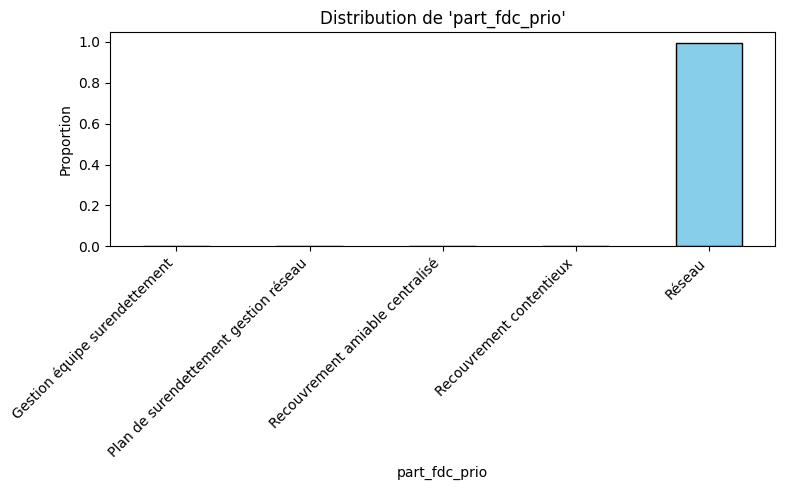

In [30]:
def plot_categorical_distribution(df, var, target=None):
    plt.figure(figsize=(8, 5))

    if target is None:
        # Distribution simple
        df[var].value_counts(normalize=True).sort_index().plot(
            kind='bar', color='skyblue', edgecolor='black'
        )
        plt.title(f"Distribution de '{var}'")
        plt.ylabel("Proportion")
        plt.xlabel(var)
    else:
        # Distribution par classe cible
        prop_df = (
            df.groupby([var, target])
              .size()
              .groupby(level=0)
              .apply(lambda x: x / x.sum())
              .unstack()
        )

        prop_df.plot(kind='bar', stacked=False, color=['lightcoral', 'skyblue'], edgecolor='black')
        plt.title(f"Distribution de '{var}' selon '{target}'")
        plt.ylabel("Proportion")
        plt.xlabel(var)
        plt.legend(title=target)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(data,'part_fdc_prio')

In [31]:
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

def cramers_v(data, x, y, seuil=5):
    # Table de contingence
    data2=data.copy()
    data2= data[[x, y]].dropna()
    table = pd.crosstab(data2[x], data2[y])
    # Test du chi-deux
    chi2, _, _, expected = chi2_contingency(table)
    # Calcul du V de Cramer
    n = table.sum().sum()
    k = min(table.shape) - 1
    v = np.sqrt(chi2 / (n * k))
    validite=False
    if (expected >= seuil).all():
        validite=True
    return v, validite

def kruskal_by_target(df, col_quanti, col_cible):
    # Séparer les groupes selon la cible
    data=df.copy()
    data = data[[col_quanti, col_cible]].dropna()
    group0 = data[data[col_cible] == 0][col_quanti]
    group1 = data[data[col_cible] == 1][col_quanti]

    # Effectuer le test de Kruskal-Wallis
    stat, p_value = kruskal(group0, group1)
    return stat, p_value

def analyze_features(df, col_cible):
    results = []

    for col in df.columns:
        if col == col_cible:
            continue

        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Variable catégorielle → V de Cramer
            v, validite = cramers_v(df, col, col_cible)
            if validite:
                results.append({'var': col, 'type': 'v_cramer', 'value': v*100})
            else: 
                results.append({'var': col, 'type': 'v_cramer_non_valide', 'value': v*100})
        else:
            # Variable numérique → p-value Kruskal-Wallis
            try:
                stat, _ = kruskal_by_target(df, col, col_cible)
                results.append({'var': col, 'type': 'stat_kruskal_wallis', 'value': stat})
            except Exception:
                print(f"Colonne à problème {col}")
    return pd.DataFrame(results)

In [32]:
first_var_selection=analyze_features(df_train.drop("month", axis=1), "cible")
first_var_selection

var                 type       value
0     sldcrdmms_sum_mm1  stat_kruskal_wallis  921.319957
1    engagement_sum_mm1  stat_kruskal_wallis  129.097206
2    top_pret_conso_mm1             v_cramer    2.333359
3    nbr_pret_conso_mm1  stat_kruskal_wallis   23.972213
4     sldcrdmms_sum_mm2  stat_kruskal_wallis  873.135630
..                  ...                  ...         ...
119   crtad_ag_nbjde_bb  stat_kruskal_wallis  832.577788
120   crtad_ag_nbjde_ba  stat_kruskal_wallis  720.204608
121   crtad_ag_nbjde_bc  stat_kruskal_wallis  368.642585
122         topcptlitig  v_cramer_non_valide    2.393309
123       somme_encours  stat_kruskal_wallis  507.655687

[124 rows x 3 columns]

In [33]:
## les variabes qualitatives
variables_qual=first_var_selection[first_var_selection["type"]!="stat_kruskal_wallis"]
variables_qual_pre_finales=variables_qual[variables_qual["value"]>=20]
variables_qual_pre_finales

var                 type      value
38          ind_dp_max  v_cramer_non_valide  29.964430
55  client_haut_risque             v_cramer  24.534611

In [34]:
print(df_train['ind_dp_max'].value_counts())
##il y a un problème avec cette variable (la modalité 5 est trop delaissée, on va fusionner les modalités 1-5

ind_dp_max
0    40773
1     1907
3      346
2      214
5        2
Name: count, dtype: int64


In [35]:
print(df_train['client_haut_risque'].value_counts())
##ici c'est sans problème

client_haut_risque
0.0    42200
1.0     1042
Name: count, dtype: int64


In [36]:
variables_quant=first_var_selection[first_var_selection["type"]=="stat_kruskal_wallis"]
variables_quant

var                 type       value
0     sldcrdmms_sum_mm1  stat_kruskal_wallis  921.319957
1    engagement_sum_mm1  stat_kruskal_wallis  129.097206
3    nbr_pret_conso_mm1  stat_kruskal_wallis   23.972213
4     sldcrdmms_sum_mm2  stat_kruskal_wallis  873.135630
5    engagement_sum_mm2  stat_kruskal_wallis  132.733038
..                  ...                  ...         ...
118         encours_par  stat_kruskal_wallis  507.697749
119   crtad_ag_nbjde_bb  stat_kruskal_wallis  832.577788
120   crtad_ag_nbjde_ba  stat_kruskal_wallis  720.204608
121   crtad_ag_nbjde_bc  stat_kruskal_wallis  368.642585
123       somme_encours  stat_kruskal_wallis  507.655687

[101 rows x 3 columns]

In [37]:
def plot_regle_du_coude(noms_variables, valeurs_stat, titre="Règle du coude", tri=True):
    # Tri décroissant
    if tri:
        data = sorted(zip(noms_variables, valeurs_stat), key=lambda x: x[1], reverse=True)
        noms_variables, valeurs_stat = zip(*data)

    # Création de la figure
    plt.figure(figsize=(12, 5))
    plt.plot(noms_variables, valeurs_stat, marker='o')
    
    # Mise en forme
    plt.title(titre, fontsize=14)
    plt.xlabel("Variables", fontsize=12)
    plt.ylabel("Valeur statistique", fontsize=12)

    # Rotation pour lisibilité
    plt.xticks(rotation=90)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

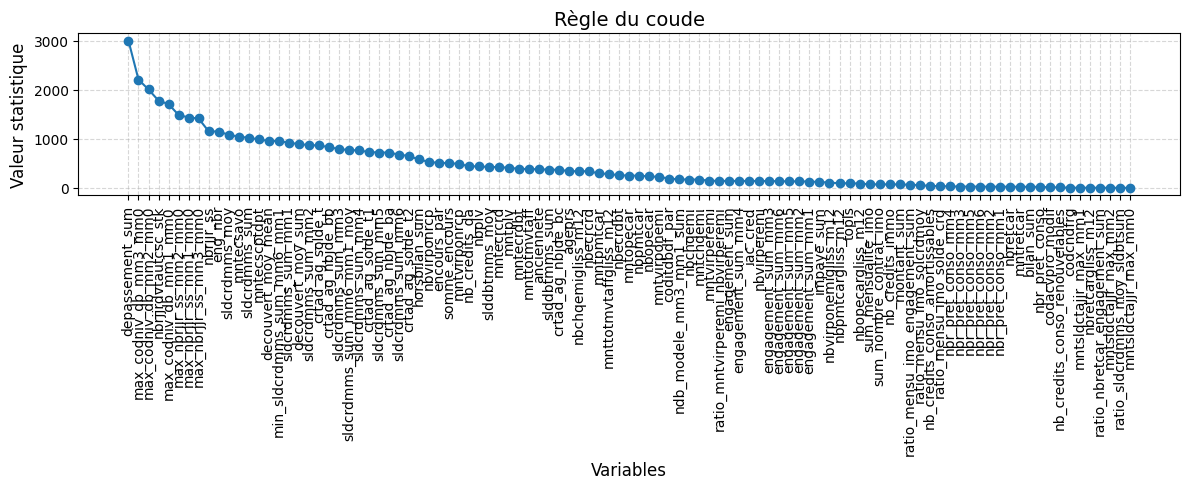

In [38]:
col_names=list(variables_quant["var"])
valeurs_stat=list(variables_quant["value"])
plot_regle_du_coude(col_names, valeurs_stat, titre="Règle du coude", tri=True)

In [39]:
nom_var_seuil="crtad_ag_solde_t2"
liste_triee = [x for _, x in sorted(zip(valeurs_stat, col_names), reverse=True)]
variables_pre_finales_quant=liste_triee[0:liste_triee.index(nom_var_seuil)+1]
print(f"Nombre de variables {len(variables_pre_finales_quant)} et les voici {variables_pre_finales_quant}")

Nombre de variables 29 et les voici ['depassement_sum', 'max_codniv_db_mm3_mm0', 'max_codniv_db_mm2_mm0', 'nbrjjrdvtautcsc_stk', 'max_codniv_db_mm1_mm0', 'max_nbrjjr_ss_mm2_mm0', 'max_nbrjjr_ss_mm1_mm0', 'max_nbrjjr_ss_mm3_mm0', 'nbrjjr_ss', 'eng_nbr', 'sldcrdmms_moy', 'mntecsavo', 'sldcrdmms_sum', 'mntecscptdpt', 'decouvert_moy_mean', 'min_sldcrdmms_sum_mm6_mm1', 'sldcrdmms_sum_mm1', 'decouvert_moy_sum', 'sldcrdmms_sum_mm2', 'crtad_ag_solde_t', 'crtad_ag_nbjde_bb', 'sldcrdmms_sum_mm3', 'sldcrdmms_sum_mm6_mm1_moy', 'sldcrdmms_sum_mm4', 'crtad_ag_solde_t1', 'sldcrdmms_sum_mm5', 'crtad_ag_nbjde_ba', 'sldcrdmms_sum_mm6', 'crtad_ag_solde_t2']


In [40]:
##Etapes à venir
##Faire la discretisation
#Sélectionner les variables selon après discrétisation
#Lancer le modèle logistique
#Faire le tableau
##Calculer les performances

In [41]:
##discretisation avec les arbres
from sklearn.tree import DecisionTreeClassifier

def discretize_with_tree(df, col, cible, max_depth=2):
    X = df[[col]]
    y = df[cible]

    # Entraînement de l'arbre
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion="gini", class_weight="balanced", random_state=42)
    tree.fit(X, y)

    # Extraction et tri des seuils
    thresholds = tree.tree_.threshold[tree.tree_.threshold != -2]
    thresholds = np.sort(thresholds)

    # Discrétisation avec np.digitize
    discretized = pd.Series(np.digitize(df[col], bins=thresholds), index=df.index)

    discretized[df[col].isna()] = -1

    return thresholds, discretized.astype('category')

In [42]:
data["cible"].value_counts()

cible
0    53312
1      741
Name: count, dtype: int64

In [43]:
##on discretise all les variables quantitatives
df_train2=df_train.copy()
df_test2=df_test.copy()
data_kaggle2=data_kaggle.copy()
all_thresholds= {}
for col in variables_pre_finales_quant:
    thresholds, df_train2[col]=discretize_with_tree(df_train2, col, "cible")

    discretized = pd.Series(np.digitize(df_test2[col], bins=thresholds), index=df_test2.index)
    df_test2[col]=discretized.astype('category')

    try:
        discretized_kaggle = pd.Series(np.digitize(data_kaggle2[col], bins=thresholds), index=data_kaggle2.index)
        data_kaggle2[col]=discretized_kaggle.astype('category')
    except Exception:
        print(f"probleme avec {col}")
    all_thresholds[col]=thresholds

In [44]:
data_kaggle["sldcrdmms_sum_mm6"].value_counts()

sldcrdmms_sum_mm6
0.0         1950
45.0          10
27.0           9
8.0            8
14.0           7
            ... 
7057.0         1
23555.0        1
76690.0        1
194877.0       1
140152.0       1
Name: count, Length: 44490, dtype: int64

In [45]:
## Validation des discretisations
def verifier_contraintes(df, var_discret, cible, min_pop=5, min_diff_cible=30):
    # 1. Calcul de la proportion de population par modalité
    counts = df[var_discret].value_counts(normalize=True)*100
    counts = counts.round(2)
    population_ok = (counts >= min_pop).all()

    # 2. Calcul du taux de cible par modalité
    taux_cible = df.groupby(var_discret, observed=True)[cible].mean()*100
    taux_cible=taux_cible.round(2)

    # Vérifier si la différence minimale entre toutes les paires de modalités est >= min_diff_cible
    taux_diff_ok = True
    modalities = taux_cible.index.tolist()

    for i in range(len(modalities)):
        for j in range(i+1, len(modalities)):
            diff = abs(taux_cible[modalities[i]] - taux_cible[modalities[j]])
            if diff < min_diff_cible:
                taux_diff_ok = False
                break
        if not taux_diff_ok:
            break

    details = {
        'proportions': counts.to_dict(),
        'taux_cible': taux_cible.to_dict()
    }

    return bool(population_ok and taux_diff_ok), details

def verifier_contraintes_for_all(df, var_discret_list, cible, min_pop=5, min_diff_cible=30):
    results = {}
    for var in var_discret_list:
        ok, details = verifier_contraintes(df, var, cible, min_pop, min_diff_cible)
        results[var] = {
            'ok': ok,
            'details': details
        }
    return results

In [46]:
all_results=verifier_contraintes_for_all(df=df_train2, var_discret_list=variables_pre_finales_quant, cible="cible", min_pop=5)
for _, var in enumerate(all_results):
    if all_results[var]['ok']==False:
        print(var)

depassement_sum
max_codniv_db_mm3_mm0
max_codniv_db_mm2_mm0
nbrjjrdvtautcsc_stk
max_codniv_db_mm1_mm0
max_nbrjjr_ss_mm2_mm0
max_nbrjjr_ss_mm1_mm0
max_nbrjjr_ss_mm3_mm0
nbrjjr_ss
eng_nbr
sldcrdmms_moy
mntecsavo
sldcrdmms_sum
mntecscptdpt
decouvert_moy_mean
min_sldcrdmms_sum_mm6_mm1
sldcrdmms_sum_mm1
decouvert_moy_sum
sldcrdmms_sum_mm2
crtad_ag_solde_t
crtad_ag_nbjde_bb
sldcrdmms_sum_mm3
sldcrdmms_sum_mm6_mm1_moy
sldcrdmms_sum_mm4
crtad_ag_solde_t1
sldcrdmms_sum_mm5
crtad_ag_nbjde_ba
sldcrdmms_sum_mm6
crtad_ag_solde_t2


In [47]:
def analyze_stability_grid(df, variables, cible):
    ordre_mois = ['Jan', 'Fev', 'Mars', 'Avril', 'Mai', 'Juin',
                  'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Dec']
    
    n = len(variables)
    fig, axes = plt.subplots(n, 2, figsize=(15, 7*n))
    fig.tight_layout(pad=3)
    
    # ⚠️ CORRECTION : Gestion correcte des axes selon le nombre de variables
    if n == 1:
        axes = axes.reshape(1, -1)  # Transforme en array 2D (1, 2)
    
    for i, col in enumerate(variables):
        # 1️⃣ Taux cible par mois et modalité
        taux = (
            df.groupby(['month', col], observed=True)[cible]
            .mean()
            .reset_index(name='taux_1')
        )
        taux['month'] = pd.Categorical(taux['month'], categories=ordre_mois, ordered=True)
        
        # 2️⃣ Proportions par mois
        proportions = (
            df.groupby(['month', col], observed=True)
            .size()
            .reset_index(name='count')
        )
        proportions['proportion'] = (
            proportions.groupby('month', observed=True)['count']
            .transform(lambda x: x / x.sum())
        )
        proportions = proportions[['month', col, 'proportion']]
        proportions['month'] = pd.Categorical(proportions['month'], categories=ordre_mois, ordered=True)
        
        # ---- GRAPH 1 : TAUX ----
        ax1 = axes[i, 0]  # 👈 Accès uniforme avec [i, 0]
        sns.lineplot(
            data=taux, x='month', y='taux_1', hue=col, ax=ax1, marker='o'
        )
        ax1.set_title(f"Risk selon {col}")
        ax1.set_xlabel("Mois")
        ax1.set_ylabel(f"% de risque")
        ax1.grid(True, linestyle='--', alpha=0.5)
        ax1.legend(title=col)
        
        # ---- GRAPH 2 : PROPORTIONS ----
        ax2 = axes[i, 1]  # 👈 Accès uniforme avec [i, 1]
        sns.lineplot(
            data=proportions, x='month', y='proportion', hue=col, ax=ax2, marker='o'
        )
        ax2.set_title(f"Distribution de {col}")
        ax2.set_xlabel("Mois")
        ax2.set_ylabel("Prop.")
        ax2.grid(True, linestyle='--', alpha=0.5)
        ax2.legend(title=col)
    
    plt.show()

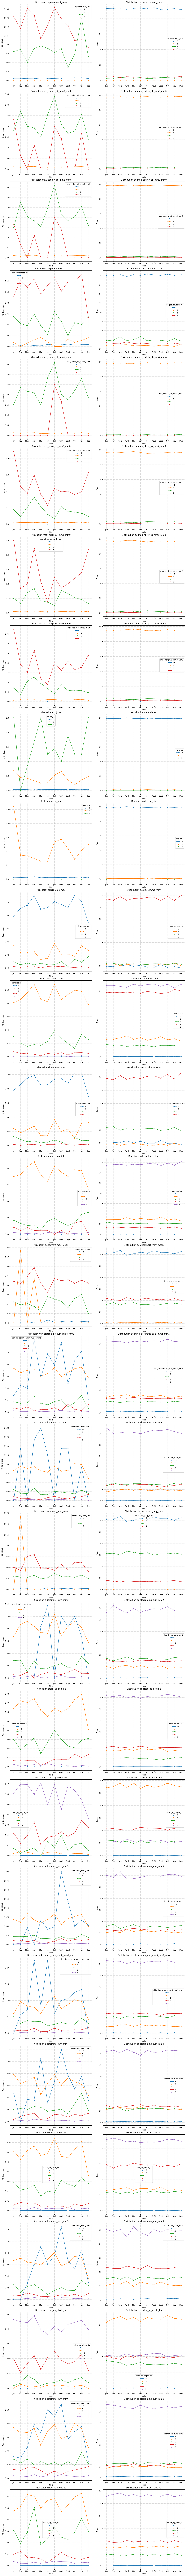

In [48]:
analyze_stability_grid(df_train2, variables_pre_finales_quant, 'cible')

In [49]:
##on va raffiner notre discrétisation
def apply_mappings_and_recat(data, mappings):
    df=data.copy()
    for spec in mappings:
        col = spec["col"]
        mapping = spec["map"]

        # 1. Appliquer le mapping
        df[col] = df[col].astype(int).replace(mapping).astype('category')
    return df

In [50]:
mappings = [
    {"col": "depassement_sum", "map": {3: 1, 2:1}},
    {"col": "max_codniv_db_mm3_mm0", "map": {2: 1, -1: 1}},
    {"col": "max_codniv_db_mm2_mm0", "map": {2: 1, -1: 1}},
    {"col": "nbrjjrdvtautcsc_stk", "map": {1: 2, 3: 2}},
    {"col": "max_codniv_db_mm1_mm0", "map": {-1: 1, 2: 1}},
    {"col": "max_nbrjjr_ss_mm2_mm0", "map": {2: 1, -1: 1}},
    {"col": "max_nbrjjr_ss_mm1_mm0", "map": {2: 1, -1: 1}},
    {"col": "max_nbrjjr_ss_mm3_mm0", "map": {2: 1, -1: 1}},
    {"col": "nbrjjr_ss", "map": {2: 1}},
    {"col": "eng_nbr", "map": {2: 1}},
    {"col": "sldcrdmms_moy", "map": {0: 2, 1: 2}},
    {"col": "mntecsavo", "map": {-1: 0, 1: 0,2: 3}},
    {"col": "sldcrdmms_sum", "map": {0: 2, 1: 2}},
    {"col": "mntecscptdpt", "map": {1: 0, 2: 0, -1: 0}},
    {"col": "decouvert_moy_mean", "map": {2: 3, 1: 3}},
    {"col": "min_sldcrdmms_sum_mm6_mm1", "map": {1: 0, 2: 0, -1: 0}},
    {"col": "sldcrdmms_sum_mm1", "map": {-1: 1, 0: 1, 2: 1}},
    {"col": "decouvert_moy_sum", "map": {3: 2, 1: 2}},
    {"col": "sldcrdmms_sum_mm2", "map": {-1: 1, 0: 1, 2: 1}},
    {"col": "crtad_ag_solde_t", "map": {0: 2, 1: 2, -1: 2}},
    {"col": "crtad_ag_nbjde_bb", "map": {3: 2, 1: 2, -1: 2}},
    {"col": "sldcrdmms_sum_mm3", "map": {-1 :1, 2: 1, 0: 1}},
    {"col": "sldcrdmms_sum_mm6_mm1_moy", "map": {-1: 2, 0: 2, 1: 2}},
    {"col": "sldcrdmms_sum_mm4", "map": {-1: 2, 1: 2, 0: 2}},
    {"col": "crtad_ag_solde_t1", "map": {-1: 0, 1: 0, 2: 3}},
    {"col": "sldcrdmms_sum_mm5", "map": {-1: 1, 0: 1, 2: 3}},
    {"col": "crtad_ag_nbjde_ba", "map": {-1: 3, 1: 3, 2: 3}},
    {"col": "sldcrdmms_sum_mm6", "map": {0: 1, -1: 1, 2: 1}},
    {"col": "crtad_ag_solde_t2", "map": {-1: 2, 1: 2, 0: 2}},
    {"col": "ind_dp_max", "map": {5:3}}
]

In [51]:
df_train3=apply_mappings_and_recat(df_train2, mappings)
df_test3=apply_mappings_and_recat(df_test2, mappings)
data_kaggle3=apply_mappings_and_recat(data_kaggle2, mappings)

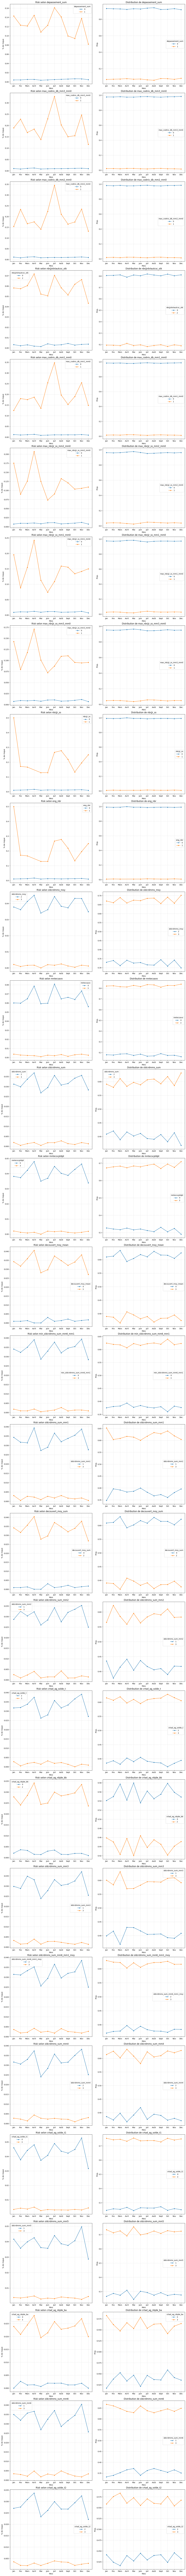

In [52]:
##stabilité après avoir affiné la discrétisation
analyze_stability_grid(df_train3, variables_pre_finales_quant, 'cible')

In [53]:
def ordonner_matrice_par_premiere_colonne(matrice_corr):
    # Nom de la première colonne
    col0 = matrice_corr.columns[0]

    # Obtenir l'ordre décroissant selon la première colonne
    ordre = matrice_corr[col0].sort_values(ascending=False).index

    # Réordonner les lignes et colonnes selon cet ordre
    matrice_reordonnee = matrice_corr.loc[ordre, ordre]

    return matrice_reordonnee 

def matrice_cramers_v(data, variables, seuil=5):
    result = pd.DataFrame(index=variables, columns=variables, dtype=float)
    for var1 in variables:
        for var2 in variables:
            if var1 == var2:
                result.loc[var1, var2] = 1.0
            else:
                v, _ = cramers_v(data, var1, var2, seuil=seuil)
                result.loc[var1, var2] = v         
    return ordonner_matrice_par_premiere_colonne(result)

def creer_liste_variables(var_qual, var_quant, cible):
    return [cible]+var_qual+var_quant

In [54]:
cols=creer_liste_variables(list(variables_qual_pre_finales["var"]), variables_pre_finales_quant, "cible")
matrices_v_cramers=matrice_cramers_v(df_train3, cols)

In [55]:
matrices_v_cramers

cible  ind_dp_max  depassement_sum  \
cible                      1.000000    0.295660         0.260271   
ind_dp_max                 0.295660    1.000000         0.849691   
depassement_sum            0.260271    0.849691         1.000000   
client_haut_risque         0.245346    0.720339         0.389593   
max_codniv_db_mm3_mm0      0.225425    0.727336         0.372636   
max_codniv_db_mm2_mm0      0.214828    0.761798         0.366236   
mntecsavo                  0.206697    0.365062         0.375702   
max_codniv_db_mm1_mm0      0.198175    0.808949         0.360203   
nbrjjrdvtautcsc_stk        0.188260    0.502190         0.468175   
max_nbrjjr_ss_mm2_mm0      0.182412    0.296458         0.273130   
max_nbrjjr_ss_mm1_mm0      0.179984    0.285901         0.260167   
max_nbrjjr_ss_mm3_mm0      0.177416    0.300620         0.283237   
nbrjjr_ss                  0.161916    0.345050         0.273339   
eng_nbr                    0.161916    0.345050         0.273339   
mntecscptdpt               0.155951    0.312968         0.335577   
sldcrdmms_moy              0.152348    0.303697         0.323700   
crtad_ag_solde_t1          0.149175    0.297310         0.316011   
sldcrdmms_sum_mm5          0.137081    0.287048         0.302157   
min_sldcrdmms_sum_mm6_mm1  0.136897    0.270656         0.289246   
decouvert_moy_mean         0.135408    0.309517         0.311467   
decouvert_moy_sum          0.134818    0.308669         0.311346   
crtad_ag_solde_t           0.129998    0.258868         0.275731   
sldcrdmms_sum_mm1          0.129794    0.263242         0.276634   
sldcrdmms_sum              0.128328    0.266276         0.282900   
sldcrdmms_sum_mm6          0.123179    0.252676         0.266327   
sldcrdmms_sum_mm4          0.122274    0.246708         0.261903   
sldcrdmms_sum_mm6_mm1_moy  0.121010    0.255833         0.268344   
sldcrdmms_sum_mm2          0.120697    0.242419         0.256191   
sldcrdmms_sum_mm3          0.119439    0.244731         0.257266   
crtad_ag_nbjde_bb          0.110581    0.225733         0.244974   
crtad_ag_solde_t2          0.107195    0.220692         0.234015   
crtad_ag_nbjde_ba          0.094036    0.185653         0.205755   

                           client_haut_risque  max_codniv_db_mm3_mm0  \
cible                                0.245346               0.225425   
ind_dp_max                           0.720339               0.727336   
depassement_sum                      0.389593               0.372636   
client_haut_risque                   1.000000               0.699135   
max_codniv_db_mm3_mm0                0.699135               1.000000   
max_codniv_db_mm2_mm0                0.677902               0.945483   
mntecsavo                            0.165684               0.167380   
max_codniv_db_mm1_mm0                0.667922               0.886016   
nbrjjrdvtautcsc_stk                  0.213119               0.210197   
max_nbrjjr_ss_mm2_mm0                0.048300               0.084807   
max_nbrjjr_ss_mm1_mm0                0.041792               0.076708   
max_nbrjjr_ss_mm3_mm0                0.053798               0.089860   
nbrjjr_ss                            0.034129               0.045353   
eng_nbr                              0.034129               0.045353   
mntecscptdpt                         0.157784               0.158565   
sldcrdmms_moy                        0.160010               0.157256   
crtad_ag_solde_t1                    0.178157               0.177595   
sldcrdmms_sum_mm5                    0.167649               0.162455   
min_sldcrdmms_sum_mm6_mm1            0.147338               0.143516   
decouvert_moy_mean                   0.147395               0.145864   
decouvert_moy_sum                    0.147569               0.146141   
crtad_ag_solde_t                     0.136101               0.138973   
sldcrdmms_sum_mm1                    0.138560               0.137886   
sldcrdmms_sum                        0.131893            

In [56]:
matrices_v_cramers.loc["ind_dp_max",]

cible                        0.295660
ind_dp_max                   1.000000
depassement_sum              0.849691
client_haut_risque           0.720339
max_codniv_db_mm3_mm0        0.727336
max_codniv_db_mm2_mm0        0.761798
mntecsavo                    0.365062
max_codniv_db_mm1_mm0        0.808949
nbrjjrdvtautcsc_stk          0.502190
max_nbrjjr_ss_mm2_mm0        0.296458
max_nbrjjr_ss_mm1_mm0        0.285901
max_nbrjjr_ss_mm3_mm0        0.300620
nbrjjr_ss                    0.345050
eng_nbr                      0.345050
mntecscptdpt                 0.312968
sldcrdmms_moy                0.303697
crtad_ag_solde_t1            0.297310
sldcrdmms_sum_mm5            0.287048
min_sldcrdmms_sum_mm6_mm1    0.270656
decouvert_moy_mean           0.309517
decouvert_moy_sum            0.308669
crtad_ag_solde_t             0.258868
sldcrdmms_sum_mm1            0.263242
sldcrdmms_sum                0.266276
sldcrdmms_sum_mm6            0.252676
sldcrdmms_sum_mm4            0.246708
sldcrdmms_su

In [57]:
def has_perfect_modality(df, target, var):
    for modality, group in df.groupby(var, observed=True):
        prop = group[target].mean()
        if prop == 0 or prop == 1:
            return True
    return False
    
target="cible"
for var in cols:
    if var!=target:
        if has_perfect_modality(df_train3, "cible", var):
            print(f"!!!{var} has perfect modality")

In [58]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
import statsmodels.formula.api as smf

def all_coeff_of_var_significants(model, var, seuil=0.05):
    # Récupérer les p-values de la variable ind_dp_max
    pvals_ind_dp_max = model.pvalues[model.pvalues.index.str.startswith(f"C({var}")]
    # Tester si toutes sont < 0.05
    all_significant = (pvals_ind_dp_max <= seuil).all()
    return bool(all_significant)

def forward_selection_logit(data, target, cramers_matrix, threshold=0.6):
    df=data.copy()
    variables = [col for col in cramers_matrix.columns if col != target]
    selected_vars = []
    metrics_history = []
    y = df[target]

    for var in variables:
        # Si ce n’est pas la première variable, vérifier la corrélation
        if selected_vars:
            too_correlated = False
            for sel_var in selected_vars:
                if cramers_matrix.loc[var, sel_var] > threshold:
                    too_correlated = True
                    print(f"Variable '{var}' trop corrélée avec '{sel_var}', sautée.")
                    break
            if too_correlated:
                continue

        # Ajouter la variable (première ou non)
        selected_vars.append(var)

        formula = target + ' ~ ' + ' + '.join(
        [f"C({col})" for col in selected_vars if col != target]
        )
        print(formula)
        model = smf.logit(formula=formula, data=df).fit()
        if not all_coeff_of_var_significants(model, var):
            print(f"Variable {var} non significatifs, donc sautée")
            continue
        # Ajuster le modèle logistique
        y_pred_prob = model.predict(df)
        y_pred = (y_pred_prob >= 0.5).astype(int)

        # Calculer les métriques sur le train
        accuracy = accuracy_score(y, y_pred)
        auc = roc_auc_score(y, y_pred_prob)
        auc_pr=average_precision_score(y, y_pred_prob)

        metrics_history.append({
            'var': var,
            'accur': accuracy,
            'auc': auc,
            'auc_pr': auc_pr
        })
    return pd.DataFrame(metrics_history)

In [59]:
##Sélection de variables finales
final_variables=forward_selection_logit(df_train3, "cible", matrices_v_cramers, threshold=0.6)

cible ~ C(ind_dp_max)
Optimization terminated successfully.
         Current function value: 0.056825
         Iterations 9
Variable 'depassement_sum' trop corrélée avec 'ind_dp_max', sautée.
Variable 'client_haut_risque' trop corrélée avec 'ind_dp_max', sautée.
Variable 'max_codniv_db_mm3_mm0' trop corrélée avec 'ind_dp_max', sautée.
Variable 'max_codniv_db_mm2_mm0' trop corrélée avec 'ind_dp_max', sautée.
cible ~ C(ind_dp_max) + C(mntecsavo)
Optimization terminated successfully.
         Current function value: 0.051040
         Iterations 10
Variable 'max_codniv_db_mm1_mm0' trop corrélée avec 'ind_dp_max', sautée.
cible ~ C(ind_dp_max) + C(mntecsavo) + C(nbrjjrdvtautcsc_stk)
Optimization terminated successfully.
         Current function value: 0.050462
         Iterations 10
cible ~ C(ind_dp_max) + C(mntecsavo) + C(nbrjjrdvtautcsc_stk) + C(max_nbrjjr_ss_mm2_mm0)
Optimization terminated successfully.
         Current function value: 0.048872
         Iterations 10
Variable 'max_nbrj

In [60]:
final_variables

var     accur       auc    auc_pr
0             ind_dp_max  0.986286  0.776060  0.117351
1              mntecsavo  0.986286  0.901499  0.144999
2    nbrjjrdvtautcsc_stk  0.986286  0.910182  0.152832
3  max_nbrjjr_ss_mm2_mm0  0.986356  0.925935  0.179970
4      sldcrdmms_sum_mm5  0.986379  0.934422  0.187698
5      crtad_ag_nbjde_bb  0.986379  0.936531  0.186105

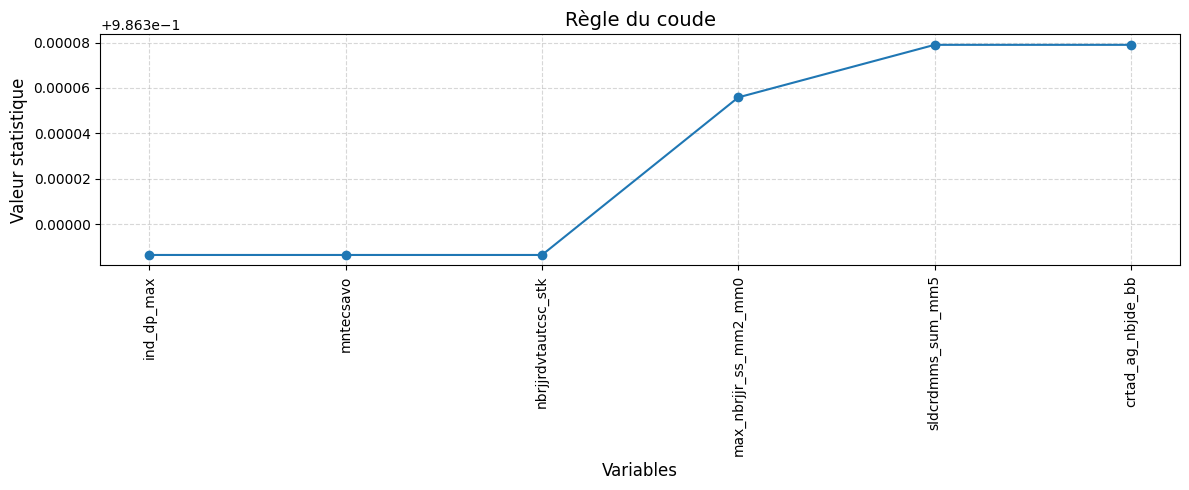

In [61]:
##on visualise l'évolution de l'accuracy
plot_regle_du_coude(list(final_variables["var"]), list(final_variables["accur"]), titre="Règle du coude", tri=False)

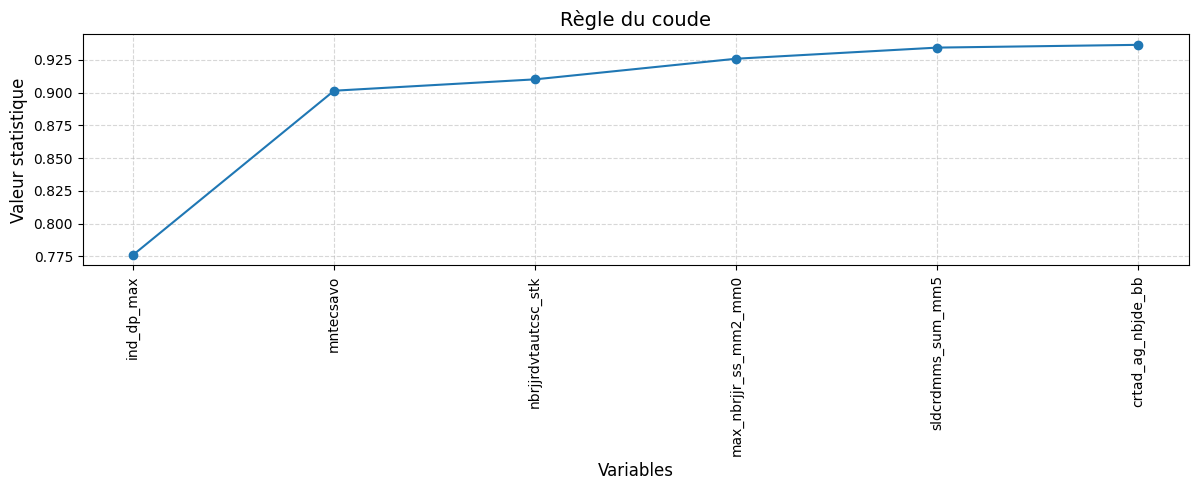

In [62]:
##on visualise l'évolution de l'AUC ROC
plot_regle_du_coude(final_variables["var"], final_variables["auc"], titre="Règle du coude", tri=False)

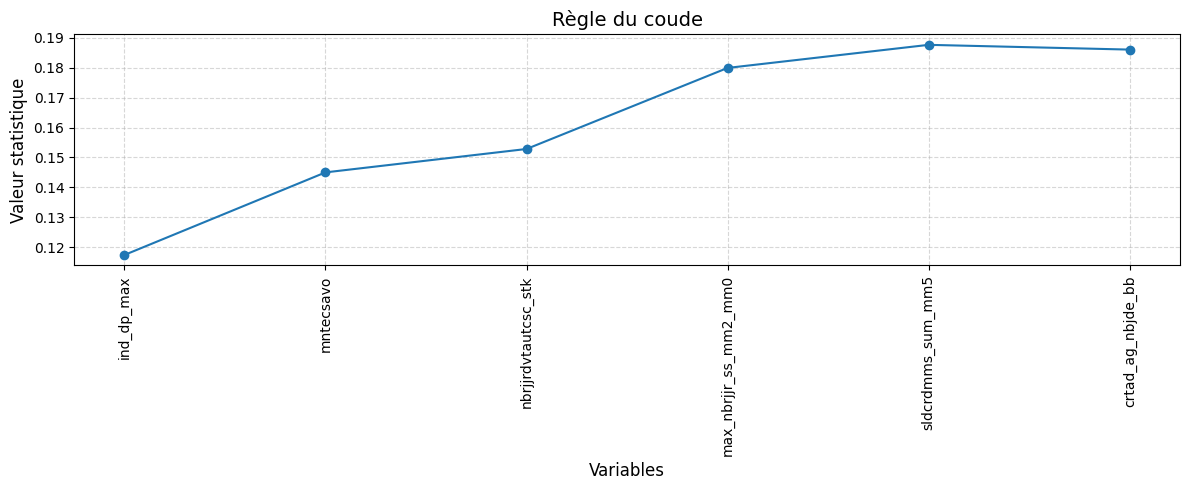

In [63]:
##on visualise l'évolution de l'AUC PC
plot_regle_du_coude(final_variables["var"], final_variables["auc_pr"], titre="Règle du coude", tri=False)

In [64]:
#variables finales
finales=list(final_variables["var"])

In [65]:
def reorder_modalites(data, col, cible):
    # 1️⃣ Calcul du taux de 1 par modalité
    df=data.copy()
    taux = df.groupby(col, observed=True)[cible].mean().sort_values()
    
    # 2️⃣ Création d’un mapping modalité → code ordonné
    mapping = {modalite: i for i, modalite in enumerate(taux.index)}
    
    return df[col].map(mapping), mapping

def reorder_modalites_for_list(df, cat_vars, cible):
    for col in cat_vars:
        df[col], _ = reorder_modalites(df, col, cible)
    return df

In [66]:
import statsmodels.formula.api as smf
def launching_logistique_model(data_train, target):
    df=data_train.copy()
    cat_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
    df=reorder_modalites_for_list(df, cat_vars, target)
    # Partie explicative : C() pour les catégorielles, rien pour les numériques
    formula = target + ' ~ ' + ' + '.join(
        [f"C({col}, Treatment(reference=0))" for col in df.columns if col != target]
        )
    model = smf.logit(formula=formula, data=df).fit()
    print(model.summary())
    return model, df

In [67]:
data_to_launch=df_train3[["cible"]+finales]
model, df_train_order=launching_logistique_model(data_to_launch, "cible")

Optimization terminated successfully.
         Current function value: 0.048661
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cible   No. Observations:                43242
Model:                          Logit   Df Residuals:                    43233
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                  0.3283
Time:                        13:00:18   Log-Likelihood:                -2104.2
converged:                       True   LL-Null:                       -3132.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept            

In [68]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, average_precision_score, auc, brier_score_loss, precision_recall_curve
from matplotlib.ticker import FuncFormatter

def reliability_diagram(y_true, y_score, n_bins=20):
    prob_true, prob_pred = calibration_curve(y_true, y_score, n_bins=n_bins)

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True, constrained_layout=True)
    
    ax1.plot(prob_pred, prob_true, marker='o', linewidth=2, label=f"Model (Brier={brier_score_loss(y_true, y_score):.2%})")
    ax1.plot([0,1],[0,1], linestyle='--', color='gray', label='Perfect calibration')
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_ylabel("Fraction of positives")
    ax1.set_title("Reliability diagram (calibration curve)")
    ax1.legend(loc="best")
    ax1.grid(alpha=0.3)
    
    ax2.hist(y_score, bins=n_bins, color='C0', edgecolor='k', alpha=0.7)
    ax2.set_xlabel("Predicted probability")
    ax2.set_ylabel("Count")
    ax2.set_title("Histogram of predicted probabilities")
    ax2.grid(alpha=0.2)
    
    N = len(y_score) if len(y_score) > 0 else 1
    ax_perc = ax2.twinx()

    primary_yticks = ax2.get_yticks()
    secondary_yticks = primary_yticks / N 

    ax_perc.set_yticks(primary_yticks)  # positionner aux mêmes valeurs numériques que l'axe gauche
    ax_perc.set_ylim(ax2.get_ylim())  # garder mêmes limites pour alignement visuel
    ax_perc.set_ylabel("Share of total (%)")
    ax_perc.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{100.0 * (y / N):.0f}%"))
    
    plt.show()

def auc_roc_plot(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color="C0", lw=2, label=f"ROC (AUC = {roc_auc:.2%})")
    plt.plot([0,1],[0,1], color="grey", lw=1, linestyle="--", label="Alea")
    plt.fill_between(fpr, tpr, alpha=0.15, color="C0")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Courbe ROC")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

def auc_pr_plot(y_true, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    plt.figure(figsize=(7,6))
    plt.plot(recall, precision, color="C0", lw=2, label=f"PR curve (AP = {average_precision_score(y_true, y_pred_prob):.2%})")
    plt.hlines(y_true.mean(), 0, 1, colors="grey", linestyles="--", label=f"Baseline (prevalence = {y_true.mean():.2%})")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Courbe Precision-Recall")
    plt.legend(loc="lower left")
    plt.grid(alpha=0.3)
    plt.show()

def metrics_for_model(model, data, cible):
    df=data.copy()
    cat_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
    df=reorder_modalites_for_list(df, cat_vars, target)

    y_true=df[cible]
    y_pred_prob = model.predict(df)
    # 2️⃣ Transformer en classes (0 ou 1) selon un seuil (souvent 0.5)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    # AUC ROC
    auc_roc_plot(y_true, y_pred_prob)
    #4️⃣ Calcul des métriques
    print("✅ Accuracy :", accuracy_score(y_true, y_pred))
    print("✅ Confusion matrix :\n", confusion_matrix(y_true, y_pred))
    print("\n✅ Rapport de classification :\n", classification_report(y_true, y_pred))
    ##AUC PR
    auc_pr_plot(y_true, y_pred_prob)
    #Score de brier
    reliability_diagram(y_true, y_pred_prob)

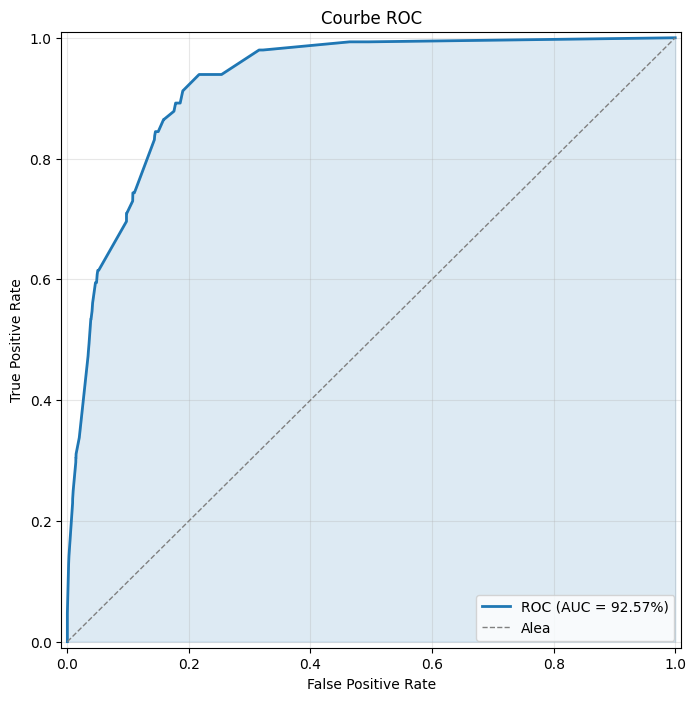

✅ Accuracy : 0.9868652298584775
✅ Confusion matrix :
 [[10663     0]
 [  142     6]]

✅ Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10663
           1       1.00      0.04      0.08       148

    accuracy                           0.99     10811
   macro avg       0.99      0.52      0.54     10811
weighted avg       0.99      0.99      0.98     10811



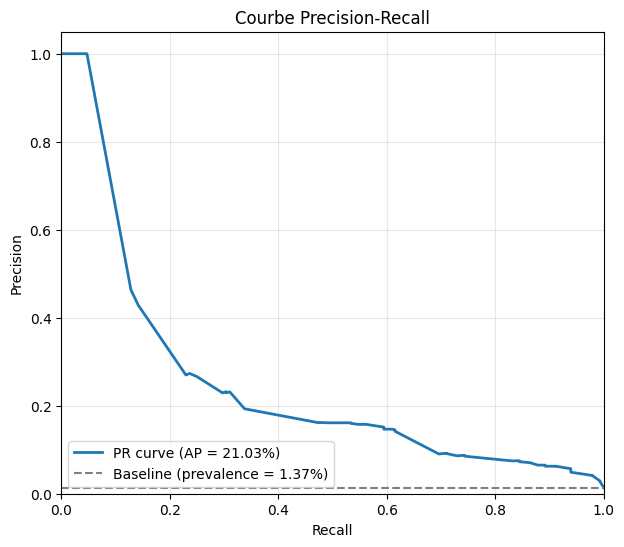

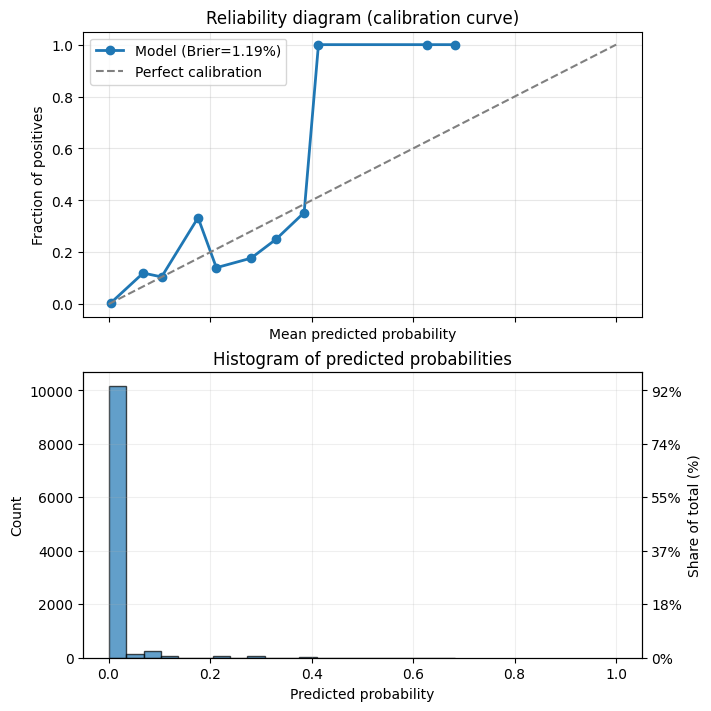

In [69]:
metrics_for_model(model, df_test3, "cible")

In [70]:
def build_scorecard(model, data, target):
    df=data.copy()
    cat_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
    df=reorder_modalites_for_list(df, cat_vars, target)
    # 1) Extraire les coefficients
    params = model.params.copy()
    rows = []

    # Lister toutes les variables
    variables = set()
    for coef_name in params.index:
        if coef_name == "Intercept":
            continue
        var_name = coef_name.split("C(")[1].split(",")[0]
        variables.add(var_name)

    # 2) Pour chaque variable, ajouter toutes ses modalités puis la modalité 0
    for var_name in variables:
        # Extraire les coefficients de cette variable
        var_coefs = {k: v for k, v in params.items() if f"C({var_name}" in k}

        # Ajouter les modalités existantes
        for coef_name, coef_value in var_coefs.items():
            modality = int(coef_name.split("T.")[1].replace("]", ""))
            pct = (df[var_name] == modality).mean()
            taux_defaut = df[df[var_name] == modality][target].mean()

            rows.append({
                "nom_technique": var_name,
                "modalite": modality,
                "pct_modalite": pct*100,
                "taux_defaut": taux_defaut*100,
                "coef": coef_value
            })

        # Ajouter la modalité 0
        pct_0 = (df[var_name] == 0).mean()
        taux_defaut_0 = df[df[var_name] == 0][target].mean()
        rows.append({
            "nom_technique": var_name,
            "modalite": 0,
            "pct_modalite": pct_0*100,
            "taux_defaut": taux_defaut_0*1001,
            "coef": 0
        })

    df_final = pd.DataFrame(rows)

    # 2bis) Trier les modalités pour chaque variable par ordre croissant
    df_final.sort_values(by=["nom_technique", "modalite"], inplace=True)
    df_final.reset_index(drop=True, inplace=True)

    # 3) Calcul des points SCj,i
    df_final["points_1000"] = np.nan
    sigma_all = {var: df_final.loc[df_final["nom_technique"] == var, "coef"].max()
                 for var in df_final["nom_technique"].unique()}
    sigma_sum = sum(sigma_all.values())

    for var in df_final["nom_technique"].unique():
        sub = df_final[df_final["nom_technique"] == var]
        alpha_j = sub["coef"].max()
        df_final.loc[df_final["nom_technique"] == var, "points_1000"] = (
            (1000 * abs(sub["coef"] - alpha_j) / sigma_sum).astype(int)
            )

    # 4) Contribution variable
    df_final["contribution_variable_echelle"] = (
        df_final.groupby("nom_technique")["points_1000"]
                .transform(lambda x: x.max() / 10)
    )
    return df_final

In [71]:
df_score=build_scorecard(model, df_train3, "cible")

In [72]:
df_score

nom_technique  modalite  pct_modalite  taux_defaut      coef  \
0       crtad_ag_nbjde_bb         0     55.614911     2.206038  0.000000   
1       crtad_ag_nbjde_bb         1     44.385089     2.813526  0.583879   
2              ind_dp_max         0     94.290273     5.867584  0.000000   
3              ind_dp_max         1      4.410064    12.008390  1.169300   
4              ind_dp_max         2      0.804773    16.954023  1.999767   
5              ind_dp_max         3      0.494889    30.841121  2.871590   
6   max_nbrjjr_ss_mm2_mm0         0     96.107951     9.441806  0.000000   
7   max_nbrjjr_ss_mm2_mm0         1      3.892049    11.942959  1.231186   
8               mntecsavo         0     82.313492     2.559167  0.000000   
9               mntecsavo         1     17.686508     6.563808  1.818483   
10    nbrjjrdvtautcsc_stk         0     80.669257     2.984376  0.000000   
11    nbrjjrdvtautcsc_stk         1     19.330743     5.849982  0.707666   
12      sldcrdmms_sum_mm5         0     71.900005     3.734714  0.000000   
13      sldcrdmms_sum_mm5         1     28.099995     3.925603  0.241888   

    points_1000  contribution_variable_echelle  
0          78.0                            7.8  
1           0.0                            7.8  
2         385.0                           38.5  
3         228.0                           38.5  
4         116.0                           38.5  
5           0.0                           38.5  
6         165.0                           16.5  
7           0.0                           16.5  
8         243.0                           24.3  
9           0.0                           24.3  
10         94.0                            9.4  
11          0.0                            9.4  
12         32.0                            3.2  
13          0.0                            3.2

In [73]:
data_kaggle3

datdelhis_mm0   numtecprs                 id sldcrdmms_sum_mm1  \
0            202409  6099659558  202409@6099659558                 3   
1            202405   599766044   202405@599766044                 3   
2            202412  5125674890  202412@5125674890                 1   
3            202401  2453995549  202401@2453995549                 3   
4            202401  1166976276  202401@1166976276                 3   
...             ...         ...                ...               ...   
54661        202409  7099596790  202409@7099596790                 1   
54662        202405  7627318453  202405@7627318453                 1   
54663        202405  5099573822  202405@5099573822                 3   
54664        202408  4671767186  202408@4671767186                 3   
54665        202404  4099769019  202404@4099769019                 1   

       engagement_sum_mm1 top_pret_conso_mm1  nbr_pret_conso_mm1  \
0                  709.62                0.0                 0.0   
1                  800.00                0.0                 0.0   
2                  200.00                0.0                 0.0   
3                18705.91                1.0                 1.0   
4                26454.70                1.0                 1.0   
...                   ...                ...                 ...   
54661              300.00                0.0                 0.0   
54662             1500.00                0.0                 0.0   
54663                1.60                0.0                 0.0   
54664              200.00                0.0                 0.0   
54665              500.00                0.0                 0.0   

      sldcrdmms_sum_mm2  engagement_sum_mm2 top_pret_conso_mm2  ...  \
0                     3              500.00                0.0  ...   
1                     3              800.00                0.0  ...   
2                     1              200.00                0.0  ...   
3                     3            18953.30                1.0  ...   
4                     1            26774.11                1.0  ...   
...                 ...                 ...                ...  ...   
54661                 1              300.00                0.0  ...   
54662                 1             1500.00                0.0  ...   
54663                 3                2.00                0.0  ...   
54664                 3              200.00                0.0  ...   
54665                 1              500.00                0.0  ...   

       crtad_ag_solde_t crtad_ag_solde_t1 crtad_ag_solde_t2  encours_par  \
0                     3                 3                 3    3257587.0   
1                     3                 3                 3      37333.0   
2                     2                 3                 2    1428666.0   
3                     3                 3                 3      44963.0   
4                     3                 3                 2     773332.0   
...                 ...               ...               ...          ...   
54661                 2                 0                 2       3666.0   
54662                 3                 3                 2    4281909.0   
54663                 3                 3                 3    1098756.0   
54664                 3                 3                 3          0.0   
54665                 2                 0                 2    6899035.0   

       crtad_ag_nbjde_bb crtad_ag_nbjde_ba  crtad_ag_nbjde_bc topcptlitig  \
0                      2                 3                0.0         0.0   
1                      0                 0                0.0         0.0   
2                      2                 3               25.0         0.0   
3                      0                 3                0.0         0.0   
4                      0                 3               16.0         0.0   
...                  ...               ...                ...         ...   
54661              

In [74]:
formula = "cible" + ' ~ ' + ' + '.join(
        [f"C({col})" for col in finales]
        )
model2 = smf.logit(formula=formula, data=df_train3).fit()

Optimization terminated successfully.
         Current function value: 0.048661
         Iterations 10


In [75]:
df=data_kaggle3.copy()
y_pred_prob = model2.predict(df)
df["prob"]=y_pred_prob

In [76]:
data_pour_kaggle=df[["id","prob"]]

In [77]:
data_pour_kaggle.columns = ["id", "target"]
data_pour_kaggle.head()

id    target
0  202409@6099659558  0.002224
1   202405@599766044  0.001241
2  202412@5125674890  0.002830
3  202401@2453995549  0.002516
4  202401@1166976276  0.001581

In [78]:
data_pour_kaggle.to_csv("Ikram_Davick.csv", sep=",", index=False)

In [79]:
def compute_individual_scores(data, scorecard, target):
    # Initialiser la colonne score à 0
    df = data.copy()
    df['score'] = 0

    all_vars=list(scorecard['nom_technique'].unique())
    # Pour chaque variable dans la scorecard
    for var in all_vars:
        # Sous-tableau de la scorecard pour cette variable
        sub = scorecard[scorecard['nom_technique'] == var][['modalite', 'points_1000']]

        # Créer un dictionnaire modalité -> points
        mapping = dict(zip(sub['modalite'], sub['points_1000']))

        # Ajouter les points correspondant à la modalité de chaque individu
        df['score'] += df[var].map(mapping).fillna(0).astype(int)
    return df[all_vars+["score","cible"]]


In [80]:
df_train_points=compute_individual_scores(df_train_order, df_score, "cible")
df_train_points.head()

crtad_ag_nbjde_bb ind_dp_max max_nbrjjr_ss_mm2_mm0 mntecsavo  \
15756                 0          0                     0         0   
31387                 0          0                     0         0   
39810                 0          0                     0         0   
46555                 1          0                     0         0   
30794                 1          0                     0         1   

      nbrjjrdvtautcsc_stk sldcrdmms_sum_mm5  score  cible  
15756                   0                 0    997      0  
31387                   0                 0    997      0  
39810                   0                 0    997      0  
46555                   1                 1    793      0  
30794                   1                 1    550      0

In [81]:
seuils, col_chr=discretize_with_tree(df_train_points, "score", "cible", max_depth=3)

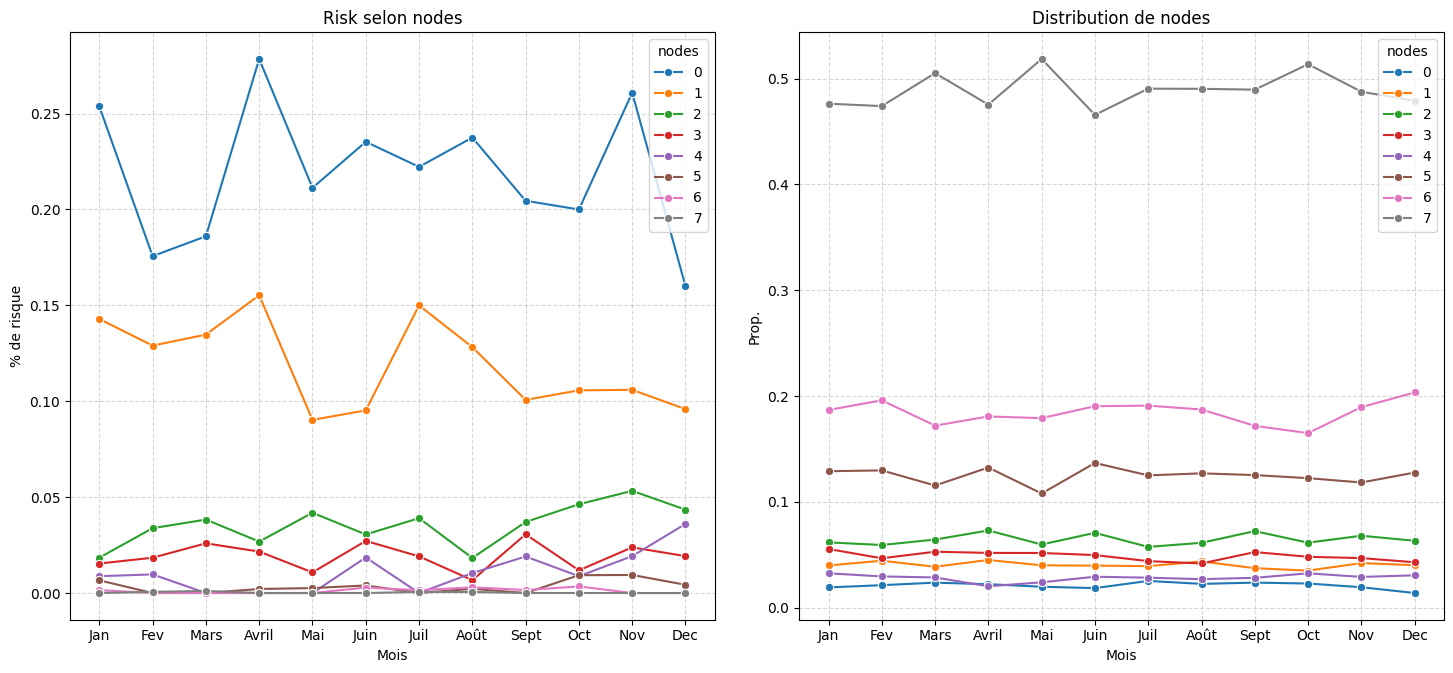

In [82]:
df_train_points["nodes"]=col_chr
df_train_points["month"]=df_train3["month"]
analyze_stability_grid(df_train_points, ["nodes"], 'cible')

In [83]:
mappings2 = [
    {"col": "nodes", "map": {3: 2, 4:2, 6:5}}
]

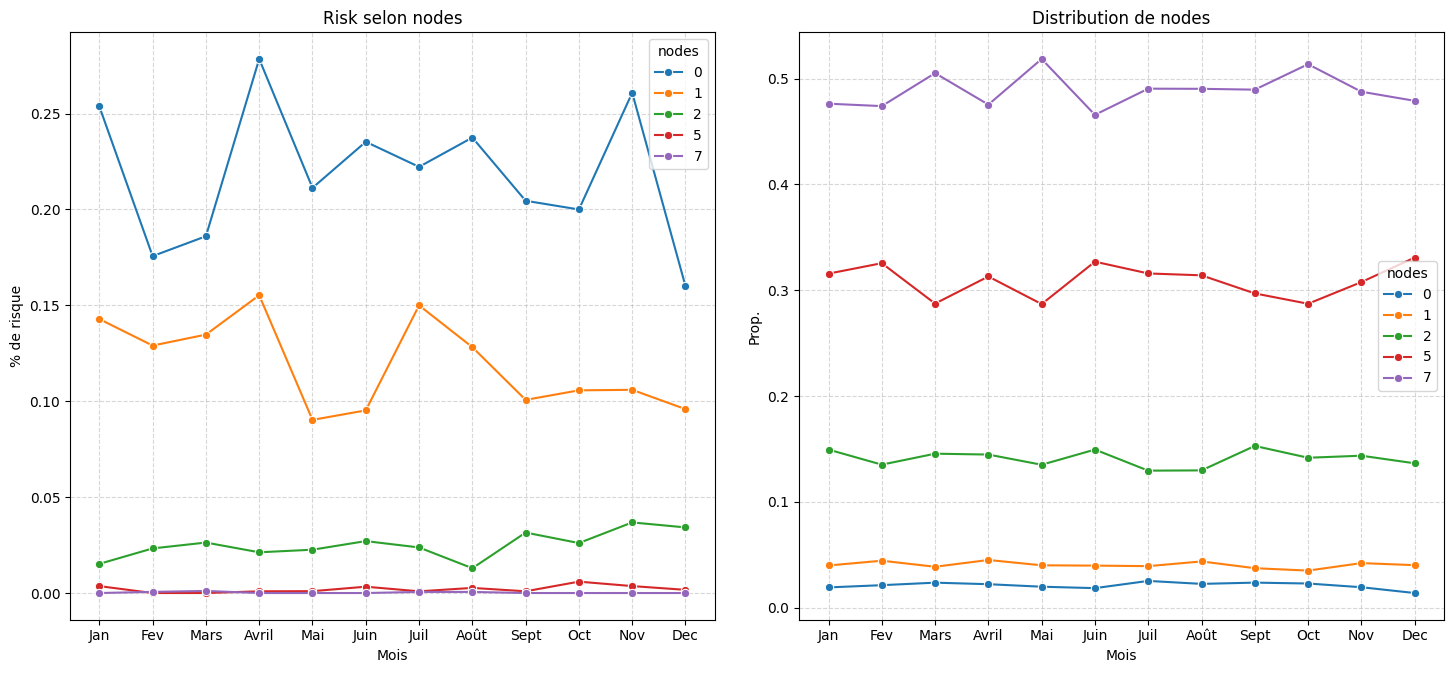

In [85]:
df_train_points_essai1=apply_mappings_and_recat(df_train_points, mappings2)
analyze_stability_grid(df_train_points_essai1, ["nodes"], 'cible')

In [87]:
mappings3 = [
    {"col": "nodes", "map": {7:5}}
]
df_train_points_essai2=apply_mappings_and_recat(df_train_points_essai1, mappings3)

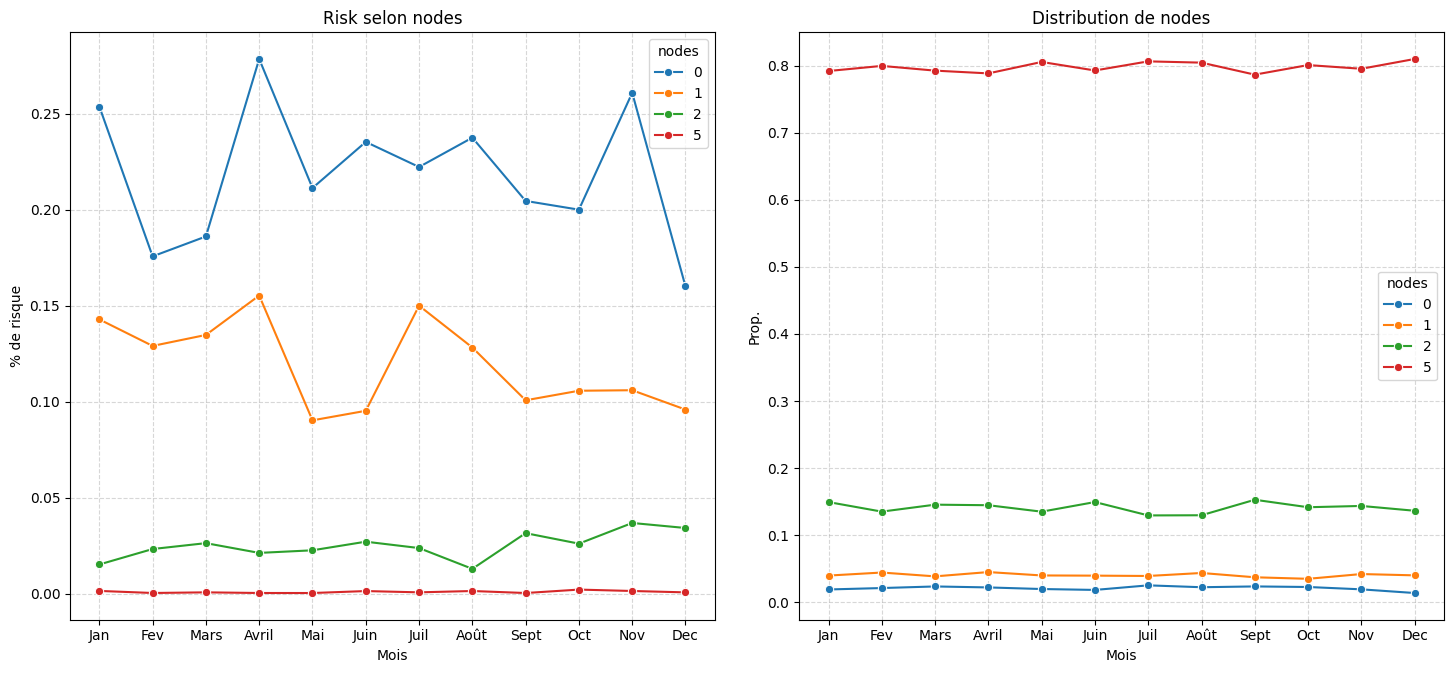

In [88]:
analyze_stability_grid(df_train_points_essai2, ["nodes"], 'cible')

In [90]:
# Calcul des taux de cible=1 par nodes
tx_par_node = (
    df_train_points_essai2
        .groupby("nodes", observed=True)["cible"]
        .mean()
        .reset_index()
        .rename(columns={"cible": "tx_chr"})
)

# Merge pour ajouter le taux à chaque individu
df_train_points_essai3 = df_train_points_essai2.merge(tx_par_node, on="nodes", how="left")

In [91]:
df_train_points_essai3

crtad_ag_nbjde_bb ind_dp_max max_nbrjjr_ss_mm2_mm0 mntecsavo  \
0                     0          0                     0         0   
1                     0          0                     0         0   
2                     0          0                     0         0   
3                     1          0                     0         0   
4                     1          0                     0         1   
...                 ...        ...                   ...       ...   
43237                 0          0                     0         0   
43238                 1          0                     0         0   
43239                 1          0                     0         0   
43240                 1          0                     0         0   
43241                 0          0                     0         0   

      nbrjjrdvtautcsc_stk sldcrdmms_sum_mm5  score  cible nodes month  \
0                       0                 0    997      0     5  Sept   
1                       0                 0    997      0     5  Mars   
2                       0                 0    997      0     5  Juil   
3                       1                 1    793      0     5   Fev   
4                       1                 1    550      0     2  Mars   
...                   ...               ...    ...    ...   ...   ...   
43237                   0                 0    997      0     5  Sept   
43238                   1                 0    825      0     5   Mai   
43239                   0                 1    887      0     5  Mars   
43240                   0                 1    887      0     5   Jan   
43241                   0                 0    997      0     5  Août   

         tx_chr  
0      0.000928  
1      0.000928  
2      0.000928  
3      0.000928  
4      0.025246  
...         ...  
43237  0.000928  
43238  0.000928  
43239  0.000928  
43240  0.000928  
43241  0.000928  

[43242 rows x 11 columns]

In [92]:
y_true = df_train_points_essai3["cible"].astype(int).values        # 0/1
y_score = df_train_points_essai3["tx_chr"].astype(float).values  # score/1000

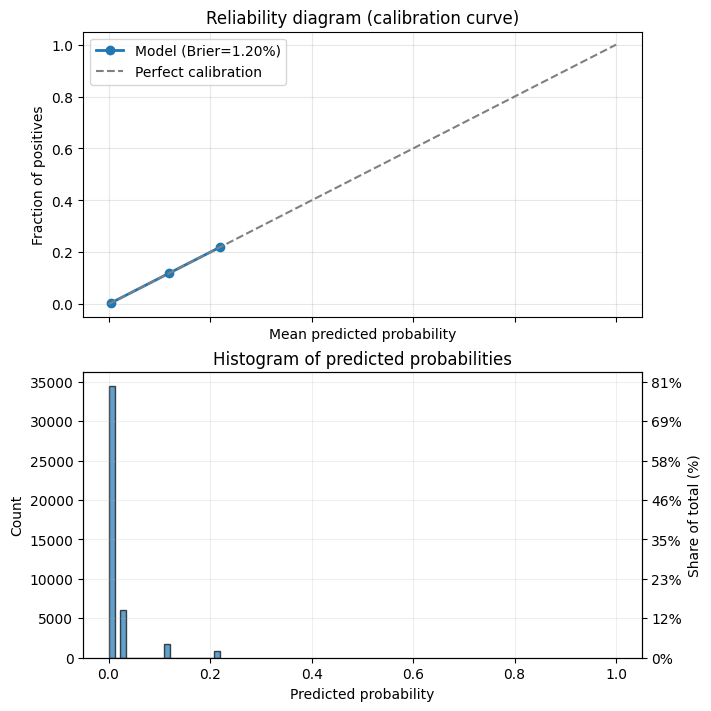

In [93]:
reliability_diagram(y_true, y_score, n_bins=20)